In [1]:
import regex as re
import pandas as pd
from pandasql import sqldf

dataset = pd.read_csv('C:/Users/NSC/Desktop/coursera/usa/JoeBidenTweets.csv')


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6064 entries, 0 to 6063
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         6064 non-null   int64 
 1   timestamp  6064 non-null   object
 2   url        6064 non-null   object
 3   tweet      6064 non-null   object
 4   replies    6064 non-null   int64 
 5   retweets   6064 non-null   int64 
 6   quotes     6064 non-null   int64 
 7   likes      6064 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 379.1+ KB


In [3]:
tweets=pd.DataFrame(dataset)

pd.set_option('display.max_colwidth',-1)
tweets.head()



<ipython-input-3-bbf64d1756ea>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


,id,timestamp,url,tweet,replies,retweets,quotes,likes
0,361388562,2007-10-24 22:45,https://twitter.com/JoeBiden/status/361388562,Tune in 11:30 ET tomorrow for a live webcast of Families USA Presidential Forum on health care: http://presidentialforums.health08.org/,19,5,17,11
1,543984392,2007-12-29 15:35,https://twitter.com/JoeBiden/status/543984392,"Iowans, there's a good chance there's a Biden near you today on a cool 14 F day: http://blog.joebiden.com/?p=1625",13,16,6,22
2,189287227321356289,2012-04-09 09:42,https://twitter.com/JoeBiden/status/189287227321356289,We're excited to announce that @JoeBiden is being rebooted for the 2012 campaign season to give you news of the Vice President on the trail.,21,82,1,20
3,189287350034104320,2012-04-09 09:43,https://twitter.com/JoeBiden/status/189287350034104320,"Campaign staff will run this account to keep you up to date on what the VP's up to, but you'll see occasional tweets from Joe himself, too.",144,76,37,51
4,189339650610036736,2012-04-09 13:11,https://twitter.com/JoeBiden/status/189339650610036736,"News for you this morning: VP Biden will speak in Exeter, NH on 4/12 on tax fairness and the President’s support for the #BuffettRule.",10,54,0,5


In [4]:
#
from pandasql import sqldf 
sql = lambda q:sqldf(q,globals())



In [6]:
# We don't need the url attribute
tweets=sql("select id,timestamp,tweet,replies,retweets,quotes,likes from tweets")
tweets.head()

,id,timestamp,tweet,replies,retweets,quotes,likes
0,361388562,2007-10-24 22:45,Tune in 11:30 ET tomorrow for a live webcast of Families USA Presidential Forum on health care: http://presidentialforums.health08.org/,19,5,17,11
1,543984392,2007-12-29 15:35,"Iowans, there's a good chance there's a Biden near you today on a cool 14 F day: http://blog.joebiden.com/?p=1625",13,16,6,22
2,189287227321356289,2012-04-09 09:42,We're excited to announce that @JoeBiden is being rebooted for the 2012 campaign season to give you news of the Vice President on the trail.,21,82,1,20
3,189287350034104320,2012-04-09 09:43,"Campaign staff will run this account to keep you up to date on what the VP's up to, but you'll see occasional tweets from Joe himself, too.",144,76,37,51
4,189339650610036736,2012-04-09 13:11,"News for you this morning: VP Biden will speak in Exeter, NH on 4/12 on tax fairness and the President’s support for the #BuffettRule.",10,54,0,5


In [7]:
tweets.describe()

,id,replies,retweets,quotes,likes
count,6.064000e+03,6064.000000,6064.000000,6064.000000,6.064000e+03
mean,1.067193e+18,2497.580145,6375.178430,625.802276,3.493577e+04
std,3.523644e+17,5272.089260,14467.163335,2036.068472,8.490843e+04
min,3.613886e+08,0.000000,1.000000,0.000000,2.000000e+00
25%,1.137118e+18,137.000000,319.000000,19.000000,1.341000e+03
50%,1.205791e+18,644.000000,1776.000000,111.000000,8.224000e+03
75%,1.271580e+18,2507.250000,6867.250000,478.250000,3.315750e+04
max,1.322886e+18,71924.000000,326070.000000,57034.000000,1.890946e+06


In [8]:
print("Start date", tweets.timestamp.min())
print("final date", tweets.timestamp.max())
sql("select count (*) as 'number of tweets' from tweets ")

Start date 2007-10-24 22:45
final date 2020-11-01 13:01


,number of tweets
0,6064


In [9]:
# Count the number of tweets by H,M,Y
tweet_freq_hour =sql("select strftime('%H',timestamp) as hour, count(*) as count from tweets group by hour;") 
tweet_freq_month =sql("select strftime('%m',timestamp) as month, count(*) as count from tweets group by month;") 
tweet_freq_year =sql("select strftime('%Y',timestamp) as year, count(*) as count from tweets group by year;") 

tweet_freq_month





,month,count
0,01,219
1,02,318
2,03,364
3,04,415
4,05,455
5,06,515
6,07,588
7,08,717
8,09,791
9,10,1046


<AxesSubplot:xlabel='year'>

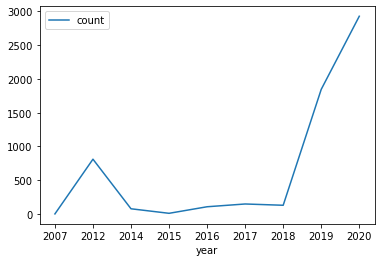

In [10]:
tweet_freq_year.plot('year')

<AxesSubplot:xlabel='month'>

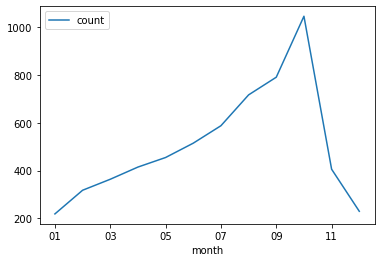

In [11]:
tweet_freq_month.plot('month')

<AxesSubplot:xlabel='hour'>

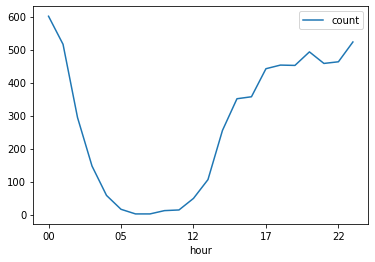

In [12]:
tweet_freq_hour.plot('hour')

In [13]:
# Let's see the most frequent tags


import numpy as np

tags=[]

for tweet in tweets.tweet:
    if(tweet[:1]=='@'):
        parts=tweet.split()
        for i in range (0, len(parts)):
            if (parts[i][0]=='@'):
                tags.append(parts[i])


In [14]:
a= pd.DataFrame(tags,columns =['tags'])
sql("select tags,count(*) as 'number of occurences' from a group by tags order by count(*) DESC limit 10")


,tags,number of occurences
0,@washingtonpost,6
1,@UDBidenInst,4
2,@NRA,3
3,@KamalaHarris,3
4,@DrBiden,3
5,@PennyPritzker,2
6,@LinkedIn,2
7,@Airbnb,2
8,@templehospital,1
9,@samanthapetrick,1


In [15]:
# let's see the full tweet for each most frequent Tag
washington_post_tweets=sql("select * from tweets where tweet like '%washingtonpost%' order by timestamp ASC")

washington_post_tweets[:5]


,id,timestamp,tweet,replies,retweets,quotes,likes
0,887076804795781121,2017-07-17 22:29,"Today, I wrote in the @washingtonpost about the big problem with the Republican leadership’s ""health"" bill: https://t.co/GYCeXPhWdX",197,1938,101,6034
1,887076943383994369,2017-07-17 22:29,"@washingtonpost Republican leadership's “health” bill would return us to a time when health care was a privilege for the wealthy, not a right for all.",34,383,9,1006
2,887077048652632064,2017-07-17 22:30,"@washingtonpost By denying this right, Republican leadership’s “health” bill is fundamentally flawed. It can’t even be fixed on the floor.",19,213,1,710
3,887077257914851328,2017-07-17 22:31,@washingtonpost All Americans deserve the peace of mind that comes with knowing that you can get affordable care. But that’s now under threat.,33,300,6,908
4,887077368791277569,2017-07-17 22:31,"@washingtonpost If you believe health care is a right for all, make sure your senators know that this bill is a big step backward.",31,345,11,1019


In [132]:
# 4 tweets in 2 minutes interesting !!!!!

NameError: name 'plt' is not defined

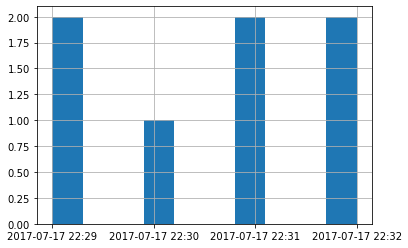

In [16]:
washington_post_tweets.timestamp.hist()
plt.xticks(rotation='vertical')

In [17]:
# Now  let's clean the data


import nltk
from nltk.corpus import stopwords
stopwords=(stopwords.words('english'))    #Save the stop words in a series


stopwords[:20]

 


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [20]:
#the datatype of attribute tweet previously was object , in order to purify the tweet we had better convert it to string 
tweets['tweet'] = tweets['tweet'].astype(str)

#tweets.tweet.apply(lambda word: [word.lower for word in word.split(' ') if word.lower() not in stopwords] )

In [21]:
sw_df = pd.DataFrame(stopwords,columns=['stopwords'])
from collections import  Counter
pure=tweets.tweet.apply(lambda word: [word.lower() for word in word.split(' ') if word.lower() not in stopwords] )


pure

0       [tune, 11:30, et, tomorrow, live, webcast, families, usa, presidential, forum, health, care:, http://presidentialforums.health08.org/]               
1       [iowans,, there's, good, chance, there's, biden, near, today, cool, 14, f, day:, http://blog.joebiden.com/?p=1625]                                   
2       [we're, excited, announce, @joebiden, rebooted, 2012, campaign, season, give, news, vice, president, trail.]                                         
3       [campaign, staff, run, account, keep, date, vp's, to,, see, occasional, tweets, joe, himself,, too.]                                                 
4       [news, morning:, vp, biden, speak, exeter,, nh, 4/12, tax, fairness, president’s, support, #buffettrule.]                                            
                                                          ...                                                                                                
6059    [president,, i’ll, build, economy, rewards, 

In [175]:
corpus =[]

for ie in pure:
    corpus+=ie
wordDict = Counter(corpus)

[(k,v) for k, v in sorted(wordDict.items(), key=lambda item: item[1], reverse=True)][:20]

[('—', 1400),
 ('president', 978),
 ('trump', 973),
 ('donald', 747),
 ('need', 550),
 ('get', 503),
 ('american', 502),
 ('every', 498),
 ('make', 493),
 ('biden', 437),
 ('it’s', 434),
 ('us', 429),
 ('one', 427),
 ('people', 412),
 ('health', 377),
 ('take', 375),
 ('time', 344),
 ('day', 328),
 ('country', 324),
 ('care', 318)]

In [177]:
# we can see that we should extend our stop word list with [ ' — ' ,  '  it's ' ]

stopwords.append('—')
stopwords.append('it’s')

In [179]:
sw_df = pd.DataFrame(stopwords,columns=['stopwords'])
from collections import  Counter
pure=tweets.tweet.apply(lambda word: [word.lower() for word in word.split(' ') if word.lower() not in stopwords] )


corpus =[]

for ie in pure:
    corpus+=ie
wordDict = Counter(corpus)

[(k,v) for k, v in sorted(wordDict.items(), key=lambda item: item[1], reverse=True)][:20]

[('president', 978),
 ('trump', 973),
 ('donald', 747),
 ('need', 550),
 ('get', 503),
 ('american', 502),
 ('every', 498),
 ('make', 493),
 ('biden', 437),
 ('us', 429),
 ('one', 427),
 ('people', 412),
 ('health', 377),
 ('take', 375),
 ('time', 344),
 ('day', 328),
 ('country', 324),
 ('care', 318),
 ('must', 300),
 ('president,', 297)]

In [186]:
# Perfect !!!!
!pip install wordcloud

#




  Using cached wordcloud-1.8.1-cp38-cp38-win_amd64.whl (155 kB)


In [187]:
from wordcloud import WordCloud

In [23]:
jb_2013 =sql("Select tweet from tweets where strftime('%Y',timestamp)= '2013';")
jb_2014 =sql("Select tweet from tweets where strftime('%Y',timestamp)= '2014';")
jb_2015 =sql("Select tweet from tweets where strftime('%Y',timestamp)= '2015';")
jb_2016 =sql("Select tweet from tweets where strftime('%Y',timestamp)= '2016';")
jb_2017 =sql("Select tweet from tweets where strftime('%Y',timestamp)= '2017';")
jb_2018 =sql("Select tweet from tweets where strftime('%Y',timestamp)= '2018';")
jb_2019 =sql("Select tweet from tweets where strftime('%Y',timestamp)= '2019';")
jb_2020 =sql("Select tweet from tweets where strftime('%Y',timestamp)= '2020';")



def wordclawd(df_in):
    df=df_in.copy()
    df['pure_tweet']=df.tweet.apply(lambda word: [word.lower() for word in word.split(' ') if word.lower() not in stopwords] )
    year_corpus=[]
    for ie in df.tweet:
        year_corpus+=ie
    worDict = Counter(year_corpus)
    wordcloud=WordCloud().generate_from_frequencies(wordDict)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis("off")
    plt.show()

JB Tweets From year  2013


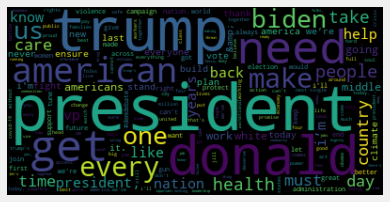

JB Tweets From year  2014


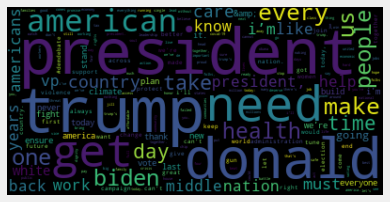

JB Tweets From year  2015


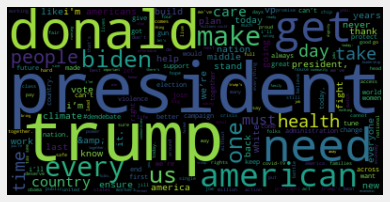

JB Tweets From year  2016


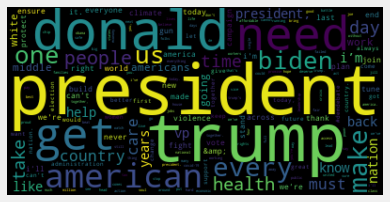

JB Tweets From year  2017


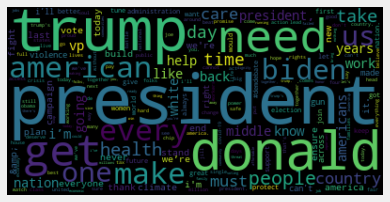

JB Tweets From year  2018


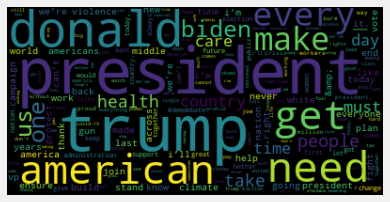

JB Tweets From year  2019


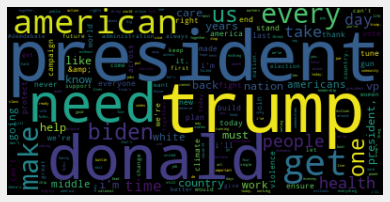

In [207]:
for year in range(2013,2020):
    df_name='jb_' + str(year)
    print('JB Tweets From year ',year)
    wordclawd(eval(df_name))

In [211]:
#Donald trump is the most frequent person in his tweets
!pip install textblob


  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [26]:
from textblob import TextBlob

#see if the the tweet is more likely to be (positive >0)  or more likely to be (negative <0)
tweets['sentiment'] = tweets.tweet.apply(lambda text: TextBlob(text).sentiment[0])



In [219]:
sql("select tweet, sentiment from tweets order by sentiments ASC")

,tweet,sentiment
0,"Lilly Ledbetter: Romney's position on pay equity is a ""terrible injustice"" for women. http://t.co/kCjwp8FZ",-1.0
1,To all of you working to stop Republicans’ devastating “health” bill: Thank you. We’re not done yet. Please keep going.,-1.0
2,"Brought by parents, these children had no choice in coming here. Now they'll be sent to countries they've never known. Cruel. Not America.",-1.0
3,Any change that weakens Title IX protections will be devastating: https://t.co/8E3n3RIMTS,-1.0
4,"This is who Donald Trump is: a president determined to terrorize immigrant communities and rip apart families — at the border and across our country.\n\nThe question is, who are we? I believe we are a nation that will end these cruel policies and make Trump a one-term president. https://t.co/u7DA2Fnr5l",-1.0
...,...,...
6059,.@DrBiden and I send our best wishes to members of the Jain faith concluding the holy observance of Paryushan and Das Lakshan. May we all find peace and reconciliation in our lives. Michhami Dukkaddam and Kshamavani!,1.0
6060,"Jill and I want to wish a very happy birthday to President Carter –– a patriot, a humanitarian, and a friend. Thank you for your tireless dedication to our country and to the world. https://t.co/SrajBmltek",1.0
6061,"@KamalaHarris @DouglasEmhoff Happy Birthday, @DouglasEmhoff!",1.0
6062,America is a nation that values immigrants. It is and has always been one of our greatest strengths.\n\nWe need a president who understands that. https://t.co/fIuNJUrfY3,1.0


Text(0.5, 1.0, 'Sentiment Analysis  -- full range of tweets ')

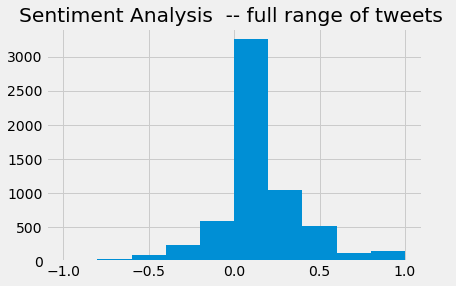

In [221]:
tweets.sentiment.hist()
plt.title("Sentiment Analysis  -- full range of tweets ")

JB tweets from year: 2013


<AxesSubplot:>

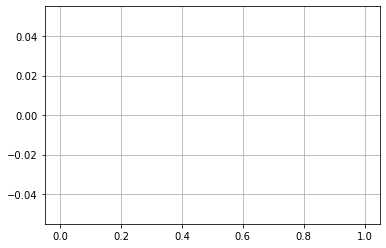

JB tweets from year: 2014


<AxesSubplot:>

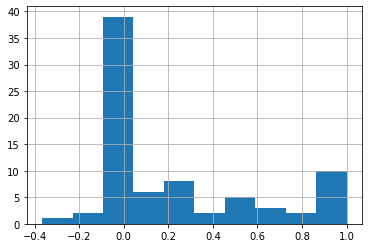

JB tweets from year: 2015


<AxesSubplot:>

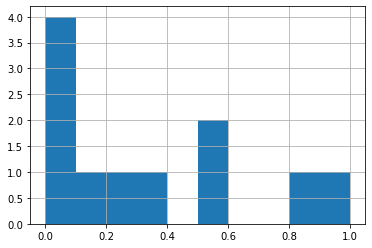

JB tweets from year: 2016


<AxesSubplot:>

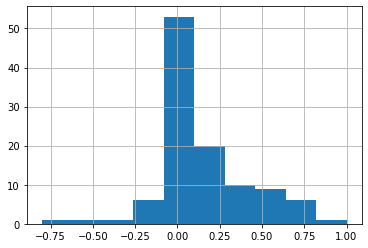

JB tweets from year: 2017


<AxesSubplot:>

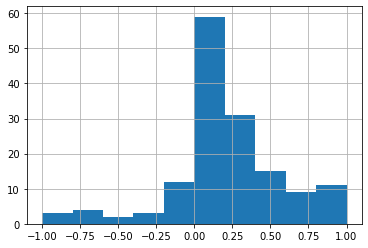

JB tweets from year: 2018


<AxesSubplot:>

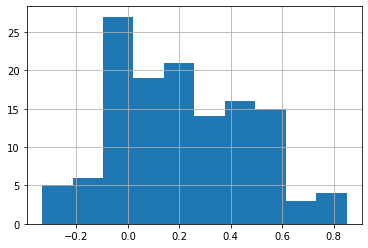

JB tweets from year: 2019


<AxesSubplot:>

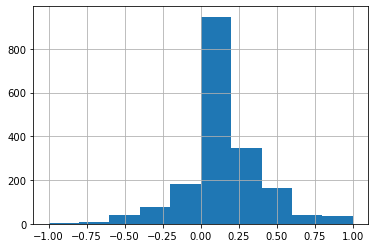

In [27]:
import matplotlib.pyplot as plt
# Let's see the sentiment analysis by year 

for year in range (2013,2020):
    df_name = 'jb_'+str(year)
    print('JB tweets from year:',year)
    temp_df=eval(df_name)
    temp_df['sentiments']= temp_df.tweet.apply(lambda text: TextBlob(text).sentiment[0])
    display(temp_df.sentiments.hist())
    plt.show()

In [225]:
# there is something special about the year 2015 !!!  a lot of negative sentiments because there is only 10 tweets in this year

In [30]:
jb_2015

,tweet,sentiments
0,VP Biden on how you can join millions of Americans who have quality health care thanks to the Affordable Care Act: https://t.co/UG3RuGpSb4,0.200000
1,The VP is pro-selfie. RT @igorbobic: Biden taking a selfie with Mark Warner's daughter for her Instagram account http://t.co/NmFtXEuy0O,0.000000
2,"The example set by Dr. King is one that inspires us to work toward a more just and equal future. Today, we celebrate that legacy.",0.166667
3,"""How do we make it better?"" Listen to VP Biden preview the State of the Union address: http://t.co/xIUBDInsIl #SOTU http://t.co/6UZbvWaGRR",0.500000
4,VP Biden is going to be listening to the #SOTU at 9pm ET tonight - join him here: http://t.co/NBNUZ6ibQe,0.000000
5,"Happy birthday, @TheEllenShow! Vice President Biden surprised her on the air. Watch: http://t.co/PwEKS32gLo",0.550000
6,♥ http://t.co/ZGFT0PqoEj,1.000000
7,"This #progress is extraordinary, but we're not done. Add your name to keep the momentum going: http://t.co/lB20ILcmGq http://t.co/S919Af9VwD",0.333333
8,Stand up for voting rights as we remember #Selma50: http://t.co/FR8SARPXUr http://t.co/4fO4T4OdAG,0.000000
9,5 years ago I watched Pres. Obama sign the Affordable Care Act. We should all be proud of the difference it's made in millions of lives –Joe,0.800000
